## Diabetes Prediction

### Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Data Overview

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no missing data but from the overview

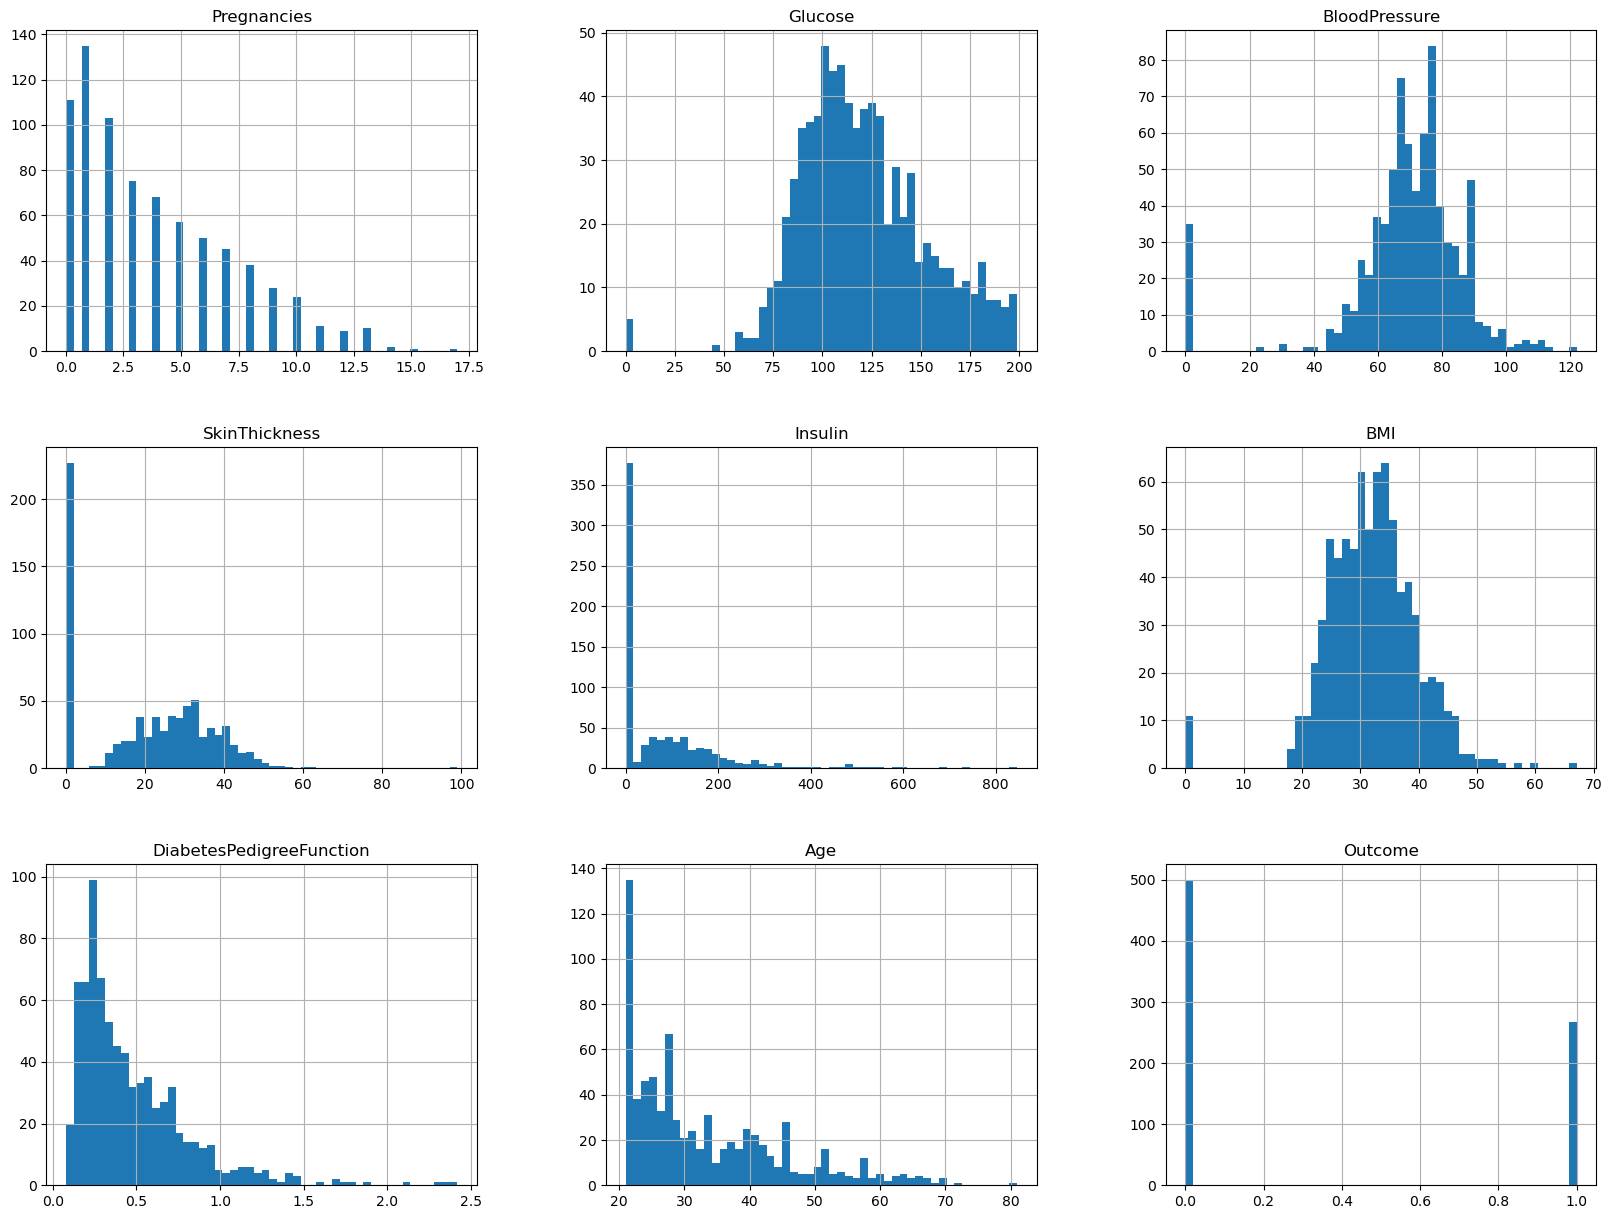

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize = (20,15))
plt.show()

In [4]:
sum(df.SkinThickness == 0)/len(df)

0.2955729166666667

In [5]:
sum(df.Insulin == 0)/len(df)

0.4869791666666667

In [6]:
corr_matrix = df.corr()

In [7]:
corr_mat_outcome = corr_matrix.Outcome.sort_values(ascending = False)
corr_mat_outcome

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

### Predicting Model using Logistic Regression 

Handle Missing/Zero Values: Some features (e.g., Glucose=0, BMI=0) are biologically impossible. Let's replace them with the mean value.


In [9]:
# Columns to impute
cols = ['Glucose', 'BMI', 'Insulin', 'SkinThickness']

# Replace zeros with NaN and then fill with column means
df[cols] = df[cols].replace(0, np.nan).fillna(df[cols].mean())

#### Case 1: Logistic Regression with Top 2 Features

In [10]:
X= df.drop(['Outcome'], axis=1)
# top_features = ['Glucose', 'BMI']
#find the top 2 features
top_features = corr_mat_outcome.index[1:3].tolist() #omit the first as it is the correlation value to itself
X_top2 = X[top_features]

y= df.Outcome


stratify=y. In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

We will standardize the features using StandardScaler class from the scikit-learn's preprocessing module:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X_top2, y, test_size=0.3,stratify=y)

# Stratification result sample
print('Labels counts in y: ', np.bincount(y))
print('Labels counts in y_train: ', np.bincount(y_train))
print('Labels counts in y_test: ', np.bincount(y_test))

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train model 
lr = LogisticRegression(C=1.0, solver = "lbfgs")
lr.fit(X_train_std, y_train)


Labels counts in y:  [500 268]
Labels counts in y_train:  [350 187]
Labels counts in y_test:  [150  81]


LogisticRegression()

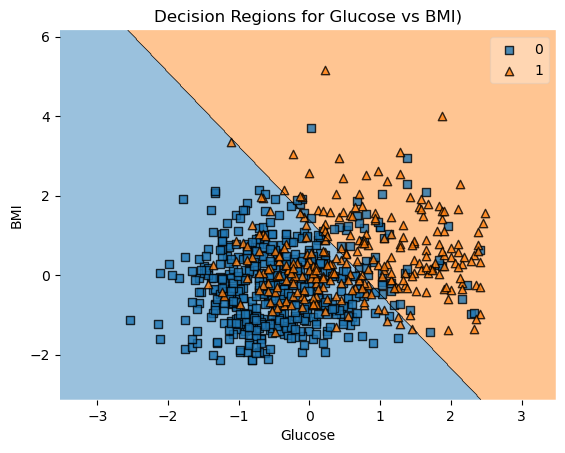

In [23]:
from mlxtend.plotting import plot_decision_regions

# Combine train + test for visualization
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions( X_combined_std, y_combined, clf=lr)#, feature_index=[1, 2])
                      # , test_idx = range(500,768))

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Decision Regions for Glucose vs BMI)')
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = lr.predict(X_test_std)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       150
           1       0.74      0.52      0.61        81

    accuracy                           0.77       231
   macro avg       0.76      0.71      0.72       231
weighted avg       0.76      0.77      0.75       231



#### Case 2: Logistic Regression with all available features 

In [25]:
# Split and scale (X this time taking all features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Train model 
lr = LogisticRegression(penalty='l2',C=1.0, solver = "lbfgs")
lr.fit(X_train_std, y_train)


LogisticRegression()

Evaluation metric using accuracy:

In [26]:
y_pred = lr.predict(X_test_std)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7835497835497836
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.73      0.60      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

